# Анализ успешности игр по игровым платформам

В настоящее время сложно представить человека, который не слышал или не играл в видеоигры. Будь-то игры на телефон, компьютер, X-box, Playstation или иное устройство. На маркет плейсах существует множество видеоигр, которые имеют ряд классификаций: по классам, жанрам, по возстрастной линейке, по популярности. Наряду с этим, существуют и рейтинги успешности выдеоигр, которые нам предстоит проанализовать в настоящем исследовании. 

## Введение

В данном исследовании представленны исторические данные о продажах игр, оценах пользователей и экспертов, жанры игр и игровые платформы . 

**`Основными целями исследования выступают:`**
1. Проанализировать сколько игр выпускалось в разные годы и как менялись продажи по платформам;
2. Срогнозировать продажи игр на 2017 год по имеющимся данным;
3. Определить платформы, которые лидируют по продажам. Выбрать несколько потенциально прибыльных платформ. 
4. Рассмотреть распределение игр по жанрам и выбрать самый прибыльный жанр игр. 
5. Определить влияет ли рейтинг ESRB на продажи в отдельном регионе. 
6. Проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
7. Проверить гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**`Ход исследования`**

Данные о продажах игр содержатся в файле `/datasets/games.csv`. О качестве предоставляемой информации ничего неизвестно в техническом задании Заказчика. В рамках исследования будет осуществлены следующие мероприятия. 

1. Анализ первоначальных данных;
2. Предобработка данных;         
3. Добавление необходимых столбцов и таблиц;
4. Определение факторов и закономерностей, влияющих на продажу игр;
5. Проведение расчетов, их визуализация в таблицах, гистограммах и графиках;
6. Рассмотрение гипотез, имеющихся у Заказчика;
7. Описание исследований в выводах.


## Импорт файлов с данными и изучение общей информации 

Для анализа данных, импортируем все необходимые нам библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
from scipy import stats as st
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go


Загрузим файл с данными и проанализируем его

In [2]:
df = pd.read_csv('/datasets/games.csv')

Построим функцию для рассмотрения основных моментов

In [3]:
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
    for column_name in df.columns:
        if column_name not in numeric_columns:
            if 'session' in column_name or 'dt' in column_name:
                df[column_name] = pd.to_datetime(df[column_name])
            else:
                display(df[column_name].value_counts())
                print(50*'*')
    return df
df = inspect(df)


Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество дубликатов - 0


Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Need for Speed: Most Wanted                            12
LEGO Marvel Super Heroes                                9
Madden NFL 07                                           9
FIFA 14                                                 9
Ratatouille                                             9
                                                       ..
Strawberry Nauts                                        1
Kuukan * Zukei: Hirameki Training - KuuTore             1
Tribes: Aerial Assault                                  1
Hot Shots Golf                                          1
PC Engine Best Collection: Tengai Makyou Collection     1
Name: name, Length: 11559, dtype: int64

**************************************************


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

**************************************************


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

**************************************************


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

**************************************************


0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: na_sales, Length: 402, dtype: int64

**************************************************


0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

**************************************************


0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

**************************************************


0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

**************************************************


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

**************************************************


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

**************************************************


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**************************************************


In [4]:
print('Количество неявных дубликатов -', df.duplicated(subset=['name', 'platform', 'year_of_release']).value_counts())

Количество неявных дубликатов - False    16713
True         2
dtype: int64


In [5]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [6]:
print('Количество неявных дубликатов -', df.duplicated(subset=['name', 'platform', 'year_of_release']).value_counts())

Количество неявных дубликатов - False    16713
dtype: int64


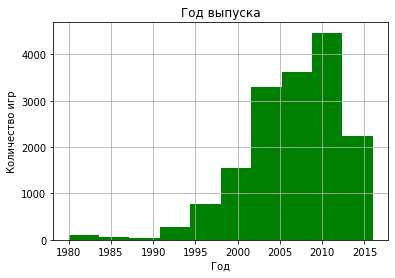

In [7]:
df.hist(column='year_of_release', bins= 10, grid= True, color='green')
plt.title('Год выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

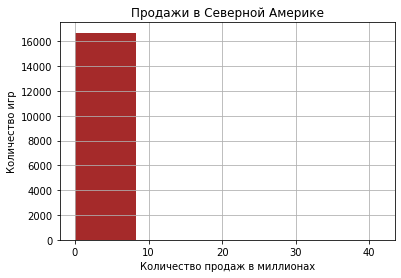

In [8]:
df.hist(column='na_sales', bins= 5, grid= True, color='brown')
plt.title('Продажи в Северной Америке')
plt.xlabel('Количество продаж в миллионах')
plt.ylabel('Количество игр')
plt.show()

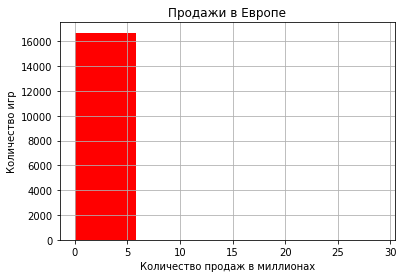

In [9]:
df.hist(column='eu_sales', bins= 5, grid= True, color='red')
plt.title('Продажи в Европе')
plt.xlabel('Количество продаж в миллионах')
plt.ylabel('Количество игр')
plt.show()

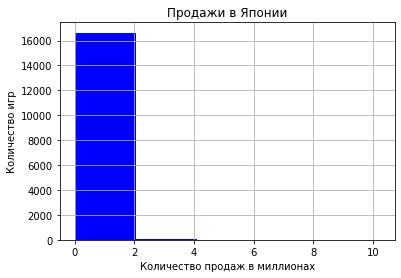

In [10]:
df.hist(column='jp_sales', bins= 5, grid= True, color='blue')
plt.title('Продажи в Японии')
plt.xlabel('Количество продаж в миллионах')
plt.ylabel('Количество игр')
plt.show()

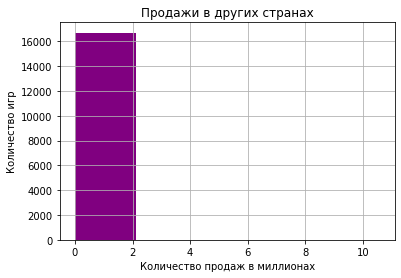

In [11]:
df.hist(column='other_sales', bins= 5, grid= True, color='purple')
plt.title('Продажи в других странах')
plt.xlabel('Количество продаж в миллионах')
plt.ylabel('Количество игр')
plt.show()

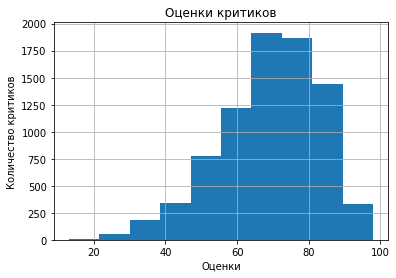

In [12]:
df.hist(column='critic_score', bins= 10, grid= True)
plt.title('Оценки критиков')
plt.xlabel('Оценки')
plt.ylabel('Количество критиков')
plt.show()

**Вывод:** из представленных данных видно, что имеются следующие 11 столбцов: 

1. **`Name`** - наименование игр;
2. **`Platform`** - платформа;
3. **`Year_of_Release`** - год выпуска игры;
4. **`Genre`** - жанр игры;
5. **`NA_sales`** - продажи в Северной Америке;
6. **`EU_sales`** - продажи в Европе;
7. **`JP_sales`** - продажи в Японии;
8. **`Other_sales`** - продажи в других регионах;
9. **`Critic_Score`** - оценка критиков;
10. **`User_Score`** - оценка пользователей;
11. **`Rating`** - рейтинг игр. 


Помимо названий столбцов можно отметить следующее:
1. Все `столбцы` необходимо `привести к нижнему регистру`;
2. В каждом столбце существует `16715`;
3. В следующих столбцах имеются пропуски: `Name`, `Genre`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`. 
4. В данных `отсутствуют явные дубликаты`. 
5. Ряд `столбцов` необходимо `преобразовать в нужные типы`.

## Предобработка данных

### Замена наименований столбцов (приведение к нижнему регистру)

In [13]:
df = df.rename(columns={'Name': 'name',
                        'Platform': 'platform',
                        'Year_of_Release': 'year_of_release',
                        'Genre': 'genre',
                        'NA_sales': 'na_sales',
                        'EU_sales': 'eu_sales',
                        'JP_sales': 'jp_sales',
                        'Other_sales': 'other_sales',
                        'Critic_Score': 'critic_score',
                        'User_Score': 'user_score',
                        'Rating': 'rating'})

In [14]:
df.head(1)

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii           2006.0  Sports     41.36     28.96      3.77   

   other_sales  critic_score user_score rating  
0         8.45          76.0          8      E

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Таким образом, все наименования столбцов были приведены к нижнему регистру

### Заполнение пропущенные значения 

Для начала выведем на экран информацию с количеством пропусков в столбцах

In [16]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Как мы видим, у нас есть три столбца практически с 1/3 пропусков данных и есть три столбца с небольшим количеством пропусков. Пропуски могли возникнуть по разным причинам: ошибка при переносе данных, игра была не популярной и ее никто не оценивал, на платформе не вродилась оценка игры и тд.

**`name` и `genre`**

In [17]:
df.query('name.isnull()').head()

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659  NaN      GEN           1993.0   NaN      1.78      0.53       0.0   

     other_sales  critic_score user_score rating  
659         0.08           NaN        NaN    NaN

Данные показывают, что в столбце `name` и `genre` пропуски в одной строке. Поскольку нет дополнительной информации, с помощью которой можно заполнить пропуски - удалим данные строки. 

In [18]:
df = df.dropna(subset=['name','genre'])

**`year_of_release`**

In [19]:
df.query('year_of_release.isnull()').head(5)

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

Поскольку количество пропусков менее 10% удалим строки с пропусками.

In [20]:
df = df.dropna(subset=['year_of_release'])

**`critic_score`**

Найти пропущенные значения в вышеуказанных пропусков является достаточно проблематичным, в особенности. Кроме того, для дальнейшего исследования они играют существенную роль. 

In [21]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Все значения целые, приведем столбец к формату `int`

In [22]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [23]:
df['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

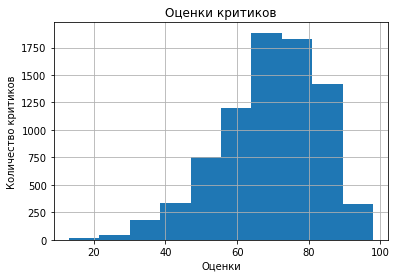

In [24]:
df.hist(column='critic_score', bins= 10, grid= True)
plt.title('Оценки критиков')
plt.xlabel('Оценки')
plt.ylabel('Количество критиков')
plt.show()

Поскольку пропусков более 1/3 заполнение их медианным значением или средним может привести к тому, что данные будут искажены. Оставим как есть. 

**`user_score`**

In [25]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
2.3       2
1.9       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Как мы видим, 2424 строк имеют значение tbd - to be determined, что означает - рейтинг еще не присвоен. Заменим эти значения на пропуски `NaN`. 

In [26]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

**`rating`**

In [27]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропущенные значения на - `undefined_rating`

In [28]:
df['rating'] = df['rating'].fillna("undefined_rating")

Опишем все виды рейтинга согласно ESRB:
- `E` - игры для всех;
- `undefined_rating` - рейтинг не определен;
- `M` - игры для взрослых старше 17 лет;
- `T` - игры для подростков от 13 лет;
- `E10+` - игры для всех от 10 лет;
- `AO` - игры для взрослых старше 18;
- `EC` - игры для детей младшего возраста;
- `RP` - игра ожидает присвоение рейтинга. 

У нас имеется еще один вид рейтинга `K-A` - в настоящее время этот рейтинг переименован в «E» («Everyone») — «Для всех». Осуществим замену.

In [29]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [30]:
df['rating'].unique()

array(['E', 'undefined_rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

### Приведем столбцы к необходимому формату

In [31]:
df = df.astype({"year_of_release":'int64', "user_score":'float64'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


### Добавление столбца `суммарные продажи во всех регионах`

In [33]:
df['sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [34]:
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45            76         8.0   
1         29.08      3.58      6.81         0.77          <NA>         NaN   
2         15.68     12.76      3.79         3.29            82         8.3   
3         15.61     10.93      3.28         2.95            80         8.0   
4         11.27      8.89     10.22         1.00          <NA>         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00          <NA>         NaN   
16711      0.00      0.01      0.00         0.00          <NA>         NaN   
16712      0.00      0.00      0.01         0.00          <NA>         NaN   
16713      0.01      0.00      0.00         0.00          <NA>         NaN   
16714      0.00      0.00      0.01         0.00          <NA>         NaN   

                 rating  sales  
0                     E  82.54  
1      undefined_rating  40.24  
2                     E  35.52  
3                     E  32.77  
4      undefined_rating  31.38  
...                 ...    ...  
16710  undefined_rating   0.01  
16711  undefined_rating   0.01  
16712  undefined_rating   0.01  
16713  undefined_rating   0.01  
16714  undefined_rating   0.01  

[16443 rows x 12 columns]

**Вывод:** в данном разделе была осуществлена предобработка данных, в рамках которой наименования всех столбцов были приведены к нижнему регистру, были удалены пропуски в некоторых столбцах, ряд столбцов были приведены к необходимому формату и добавлен столбец `sales` - суммарные продажи во всех регионах.

In [35]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sales            16443 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en co

## Исследовательский анализ

### Анализ выпуска игр по годам

Построим функцию с помощью которой мы сможем распределить игры, которые выпускались по определенным годам, а также поможет нам посчитать сумму игр, которые выпускались на разных платформах

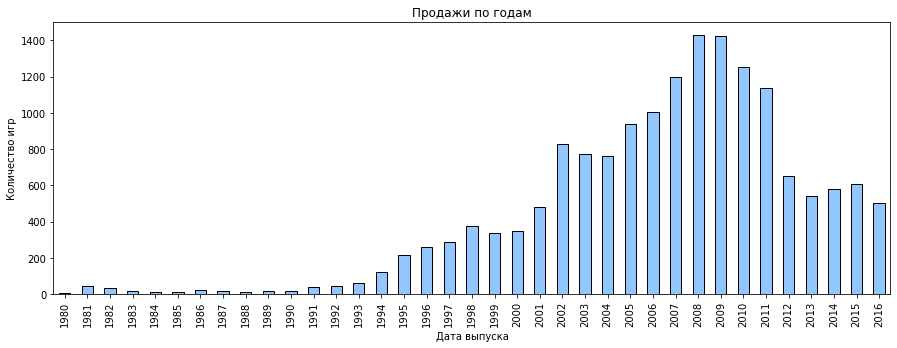

In [36]:
def bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    plt_df = df.groupby(groupby_column)[y]
    if func == 'count':
        plt_df_count = plt_df.count()
        figsize = (15,5)
        plot = plt_df_count.plot(kind='bar', y=y, figsize=figsize, ec='black', title='Продажи по годам', xlabel='Дата выпуска', ylabel='Количество игр')
    elif func == 'sum':
        plt_df_sum = plt_df.sum().sort_values()
        figsize = (15,10)
        plot = plt_df_sum.plot(kind='bar', y=y, figsize=figsize, ec='black', title='Продажи по платформам', xlabel='Платформы', ylabel='Количество игр') # для более удобного просмотра перевернем диаграмму
bar('year_of_release', 'count')

Столбачая диаграмма свидетельствует о том, что рост числа игр начался с 1993 года. Скорее всего это связано с тем, что в 90-х годах компьютеры стали набирать популярность и люди стали их больше приобретать. В 2008-2009 зафиксировано максимальное количество выпускаемых игр после чего пошел спад.

### Как менялись продажи по платформам

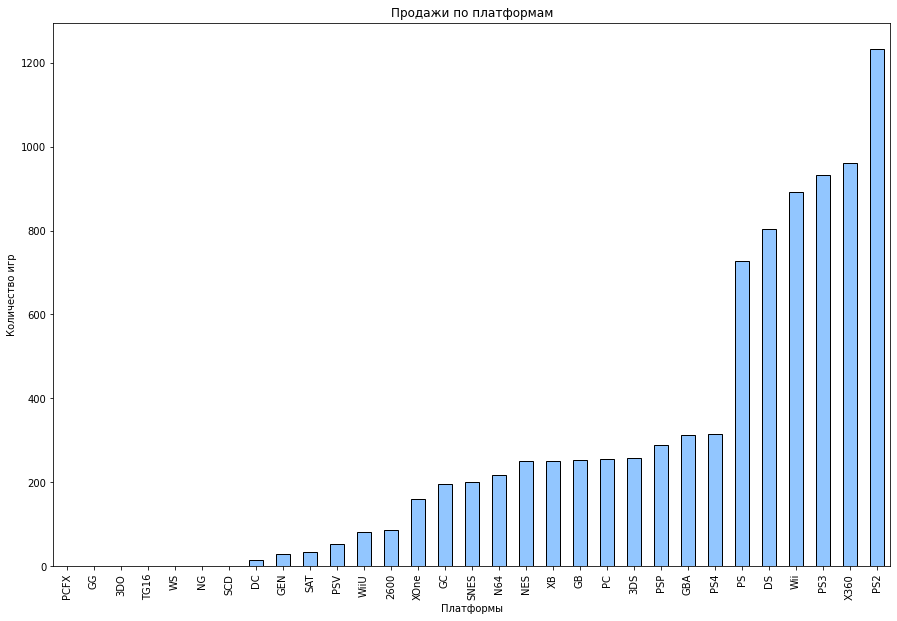

In [37]:
bar('platform', 'sum', 'sales')

Полученные данные указывают, что наибольшее количество игр было выпущено на `PS2` это связано с тем, что до 2016 года это было одним из самых популярных устройств. Далее идут `X360`, `PS3`, `Wi` и `DS`

Сформируем топ-5 платформ

In [38]:
df_top = df.pivot_table(index='platform',values=['sales'],aggfunc={'sales':'sum'}).sort_values(by='sales',ascending=False)
df_top = df_top.head()
df_top

sales
platform         
PS2       1233.56
X360       961.24
PS3        931.33
Wii        891.18
DS         802.78

**`Определим за какой характерный срок появляются новые и исчезают старые платформы`**

In [39]:
grafic=[]
for i in df_top.index:
    grafic.append(go.Scatter(
        x=df[df['platform']==i]['year_of_release'].value_counts().sort_index().index,
        y=df[df['platform']==i]['year_of_release'].value_counts().sort_index(),
        name=i))  

layout = {'title': 'График выпущенных игр на популярных платформах', 'xaxis_title': 'Год релиза', 'yaxis_title': 'Количество игр'}

fig = go.Figure(data=grafic, layout=layout)
iplot(fig, show_link=False)

## Исходя из полученных данных, средний "срок жизни" платформы - 10 лет: 
1. PS2 - 2000-2011 - 11 лет
2. DS - 2004-2013 - 9 лет
3. X360 - 2005-н.в.
4. Wi - 2006-н.в. (но игр слишком мало 2016) - 10 лет
5. PS3 - 2006-н.в.

In [40]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Прогноз на 2017 год

Поскольку нам необходимо проанализировать платформы на будущий 2017 год, изучим все платформы с 2013 по 2016 год (срок жизни платформы) и выберем наиболее перспективные платформы

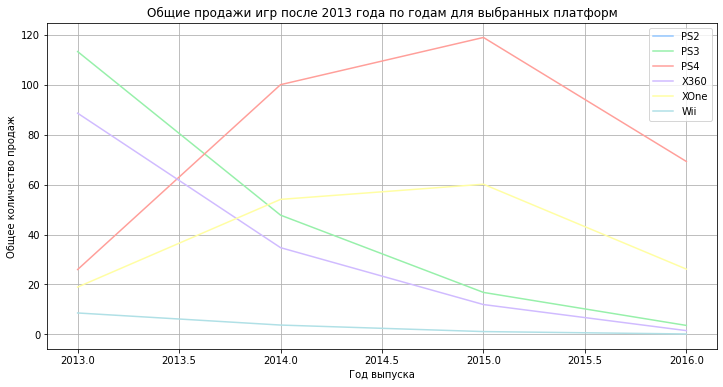

In [41]:
platforms = ['PS2', 'PS3', 'PS4', 'X360', 'XOne', 'Wii']
filtered_df = df[(df['platform'].isin(platforms)) & (df['year_of_release'] >= 2013)]

platform_sales = filtered_df.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
for platform in platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['sales'], label=platform)
plt.title('Общие продажи игр после 2013 года по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Общее количество продаж')
plt.grid(True)
plt.legend()
plt.show()



Рассматривая графики стоит отметить:
1. Наиболее перспективными платформами являются: PS4, XOne. Поскольку они были выпущены в 2013 году и исходя из "срока жизни" платформ у них есть шансы остаться до 2023 года.
2. Остальные платформы уже не пользуются большим спросом

### Определим потенциально прибыльные платформы

Так как наиболее перспективные платформы были выпущены в 2013 году потенциально прибыльные платформы будем рассматривать именно с этого года.

In [42]:
new_df = df[df['year_of_release']>=2013]
grafic = []
for i in new_df['platform'].unique():
    grafic.append(go.Box(y=new_df[new_df.platform==i]['sales'],
                         name=i))

layout = {'title': 'Диаграмма продаж с 2013 года', 'xaxis_title': 'Платформы', 'yaxis_title': 'Продажи в млн'}

fig = go.Figure(data=grafic, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1]))
iplot(fig, show_link=False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  sales            16443 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


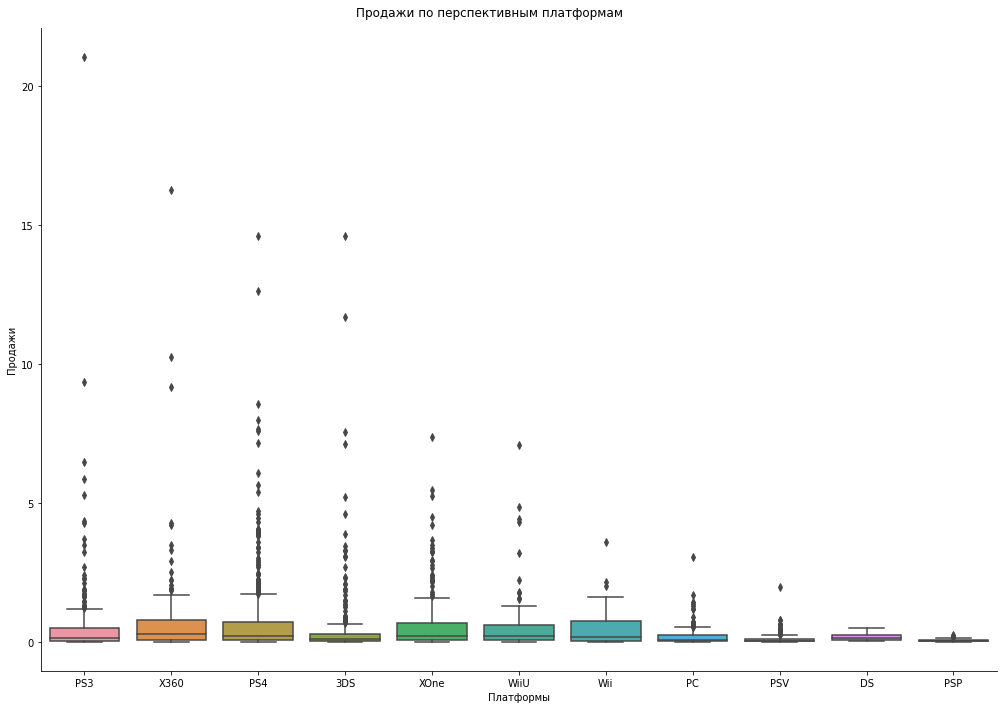

In [44]:
g = sns.catplot(x="platform",
                 y="sales",
                 data=new_df,
                 kind="box")
g.fig.suptitle("Продажи по перспективным платформам", y=1)
g.set(xlabel="Платформы",
      ylabel="Продажи")
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
plt.show()

In [45]:
data = []
for platform in new_df['platform'].unique():
    data.append(
        go.Box(y=new_df[new_df.platform==platform]['sales'], 
               name=platform)
    )
    
layout = {'title': 'Продажи по перспективным платформам', 'xaxis_title': 'Платформы', 'yaxis_title': 'Продажи'}
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

Выделим 6 основных платформ, которые выделяются по продажам и с которыми мы будем в дальнейшем работать

In [46]:
top_6 = new_df[new_df['platform'].isin(['PS3','X360','PS4','XOne', 'WiiU', 'Wii'])]

In [47]:
top_6.groupby('platform')['sales'].describe()

count      mean       std   min    25%    50%    75%    max
platform                                                             
PS3       345.0  0.525884  1.451939  0.01  0.040  0.150  0.510  21.05
PS4       392.0  0.801378  1.609456  0.01  0.060  0.200  0.730  14.63
Wii        23.0  0.593913  0.915432  0.01  0.045  0.180  0.755   3.58
WiiU      115.0  0.562000  1.038778  0.01  0.060  0.200  0.595   7.09
X360      186.0  0.735484  1.663275  0.01  0.080  0.265  0.795  16.27
XOne      247.0  0.645020  1.036139  0.01  0.060  0.220  0.685   7.39

Построем график по глобальным продажам игр в разбивке по 6 актуальным платформам.

In [48]:
data = []

for platform in top_6['platform'].unique():
    data.append(
        go.Box(y=top_6[top_6.platform==platform]['sales'], 
               name=platform)
    )
    
layout = {'title': 'Продажи по платформам', 'xaxis_title': 'Платформы', 'yaxis_title': 'Продажи'}
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

**Выводы:**
1. Наибольшие медианные продажи у XOne и X360
2. Каждая платформа имеет выбросы, что скорее всего связано с тем, что имелись очень популярные игры, которые многие приобрели. 

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

Разберем на примере одной из самых популярных платформ c 2013 года - `PS4`

Диаграмма рассеяния для PS4


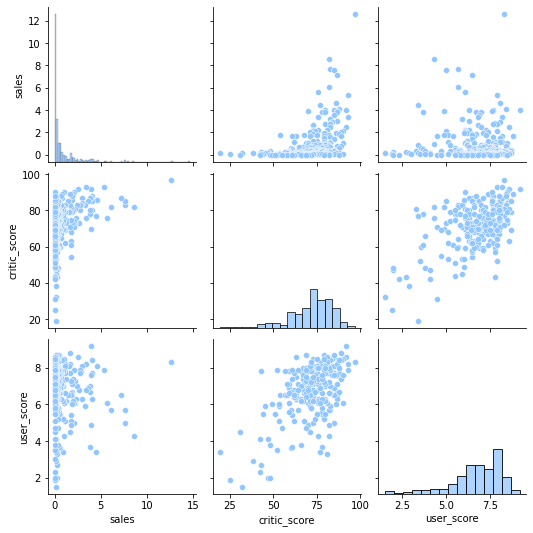

In [49]:
print("Диаграмма рассеяния для PS4")
sns.pairplot(new_df[new_df.platform == "PS4"][['sales', 'critic_score', 'user_score']])
plt.show()

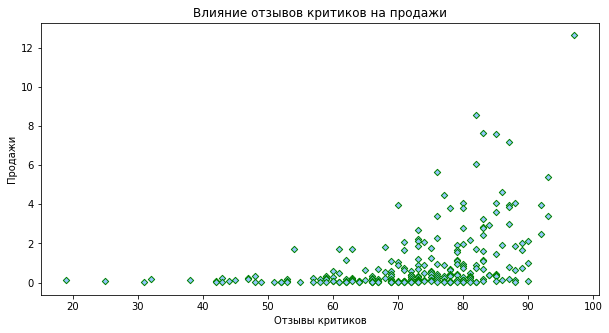

In [50]:
new_df[new_df.platform == "PS4"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()

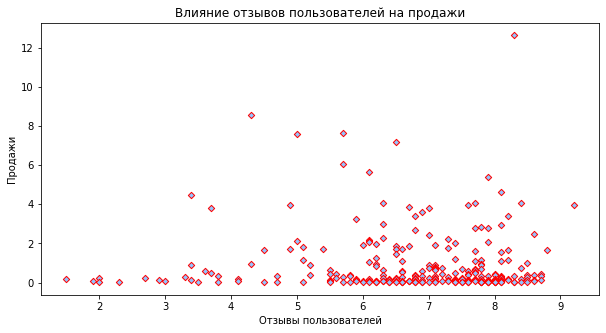

In [51]:
new_df[new_df.platform == "PS4"].plot.scatter(x='user_score', y='sales', figsize=(10,5), marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

In [52]:
display(new_df[new_df.platform == "PS4"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.406568   -0.031957
critic_score  0.406568      1.000000    0.557654
user_score   -0.031957      0.557654    1.000000

Исходя из полученных результатов можно выделить следующее:
1. Чем выше отзывы критиков, тем популярней игра и больше продаж;
2. Корреляция между `sales` и `critic_score` равна `0.4`
3. Корреляция между `sales` и `user_score` не усматривается

**Посмотрим на корреляцию на других платформах из топ рейтинга**

`XOne`

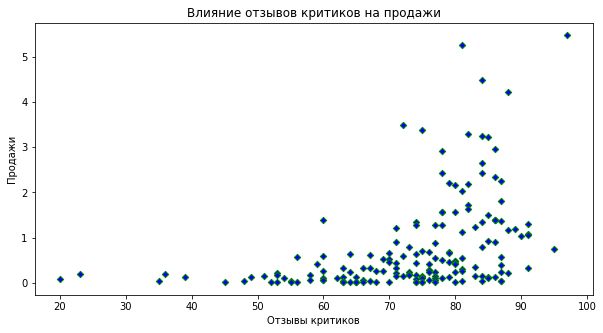

In [53]:
new_df[new_df.platform == "XOne"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), color='blue', marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()


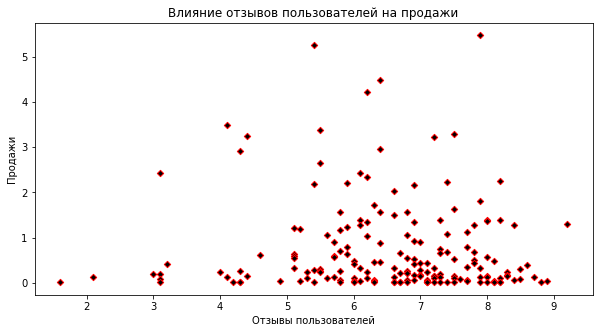

In [54]:
new_df[new_df.platform == "XOne"].plot.scatter(x='user_score', y='sales', figsize=(10,5), color='black', marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

Посмотрим на корреляцию

In [55]:
display(new_df[new_df.platform == "XOne"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.416998   -0.068925
critic_score  0.416998      1.000000    0.472462
user_score   -0.068925      0.472462    1.000000

Результаты практически аналогичные результатам PS4:
1. Чем выше отзывы критиков, тем популярней игра и больше продаж;
2. Корреляция между `sales` и `critic_score` равна `0.41`
3. Корреляция между `sales` и `user_score` не усматривается

`X360`

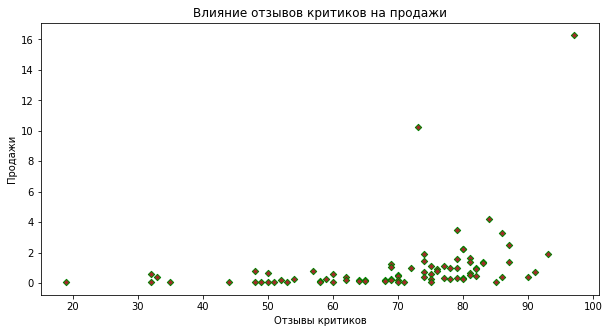

In [56]:
new_df[new_df.platform == "X360"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), color='brown', marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()

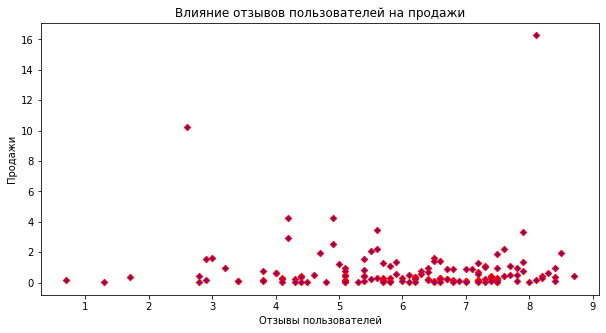

In [57]:
new_df[new_df.platform == "X360"].plot.scatter(x='user_score', y='sales', figsize=(10,5), color='purple', marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

Посмотрим на корреляцию

In [58]:
display(new_df[new_df.platform == "X360"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.350345   -0.011742
critic_score  0.350345      1.000000    0.520946
user_score   -0.011742      0.520946    1.000000

Результаты аналогичны предыдущим:
1. Корреляция между `sales` и `critic_score` равна `0.35`
2. Корреляция между `sales` и `user_score` `не усматривается`

`PS3`

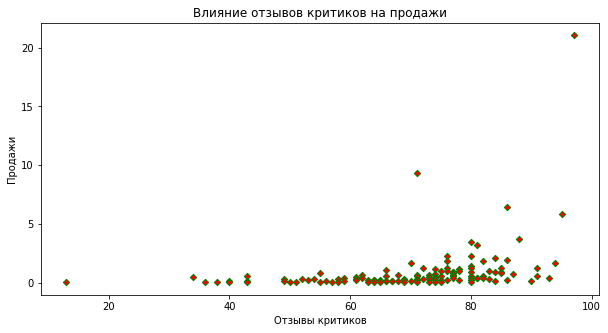

In [59]:
new_df[new_df.platform == "PS3"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), color='red', marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()

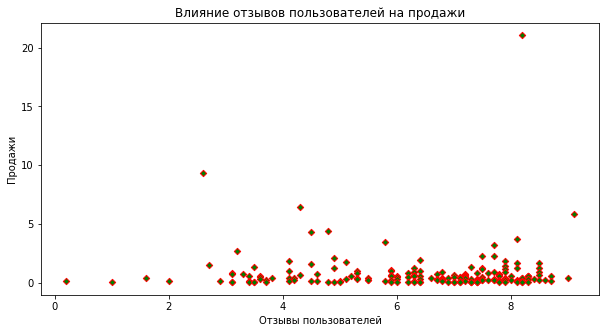

In [60]:
new_df[new_df.platform == "PS3"].plot.scatter(x='user_score', y='sales', figsize=(10,5), color='green', marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

Посмотрим на корреляцию

In [61]:
display(new_df[new_df.platform == "PS3"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.334285    0.002394
critic_score  0.334285      1.000000    0.599920
user_score    0.002394      0.599920    1.000000

Можно отметить:
1. Уровень корреляции отзывов критиком на продажи меньше, чем на предыдущих платформах;
2. Уровень корреляции отзывов пользователей на продажи - минимальный, практически нулевой. 

`PC`

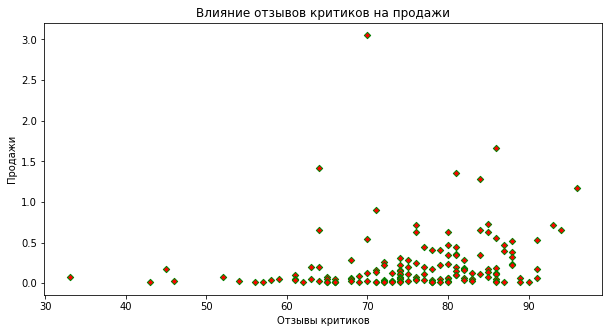

In [62]:
new_df[new_df.platform == "PC"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), color='red', marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()


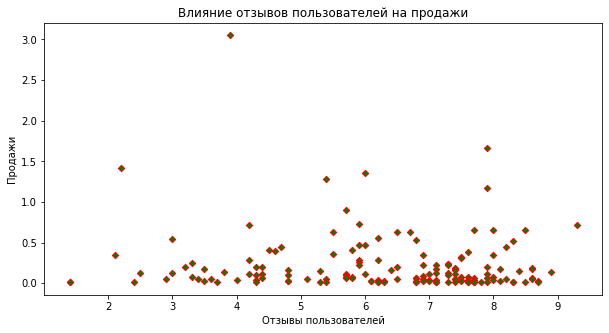

In [63]:
new_df[new_df.platform == "PC"].plot.scatter(x='user_score', y='sales', figsize=(10,5), color='green', marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

Посмотрим на корреляцию

In [64]:
display(new_df[new_df.platform == "PC"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.196030   -0.093842
critic_score  0.196030      1.000000    0.429562
user_score   -0.093842      0.429562    1.000000

Уровень корреляции отзывов критиков и продаж составляет всего 0,19. Корелляция отзывов пользователей и продаж отсутствует.

`3DS`

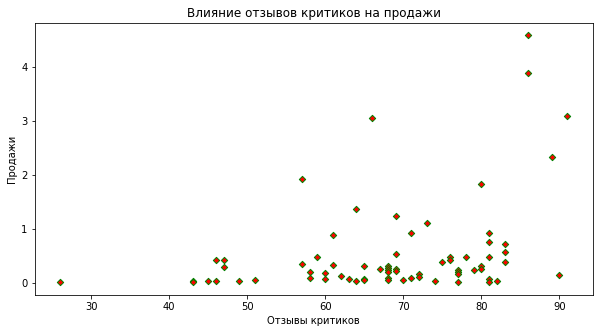

In [65]:
new_df[new_df.platform == "3DS"].plot.scatter(x='critic_score', y='sales', figsize=(10,5), color='red', marker="D", linewidths=1, edgecolors='g', title='Влияние отзывов критиков на продажи', xlabel='Отзывы критиков', ylabel='Продажи')
plt.show()

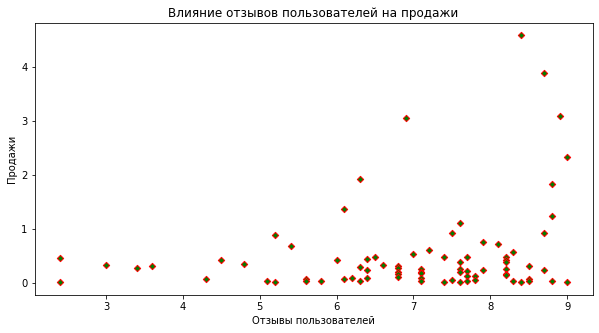

In [66]:
new_df[new_df.platform == "3DS"].plot.scatter(x='user_score', y='sales', figsize=(10,5), color='green', marker="D", linewidths=1, edgecolors='r', title='Влияние отзывов пользователей на продажи', xlabel='Отзывы пользователей', ylabel='Продажи')
plt.show()

Посмотрим корреляцию

In [67]:
display(new_df[new_df.platform == "3DS"][['sales', 'critic_score', 'user_score']].corr())

sales  critic_score  user_score
sales         1.000000      0.357057    0.241504
critic_score  0.357057      1.000000    0.769536
user_score    0.241504      0.769536    1.000000

Выводы:
1. Корреляция между `sales` и `critic_score` равна `0.35`
2. Корреляция между `sales` и `user_score` составляет `0,24`

**Подводя итоги, можно отметить:**
1. Как с PS4 наблюдается большая корреляция по отзывам критиков у PS3, X360, 3DS и XOne;
2. Практически на всех платформах корреляция по отзывам пользователей либо очень маленькая либо вообще отсутствует;
3. Наибольшая корреляция по отзывам пользователей наблюдается у 3DS - 0,24.

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:194: RuntimeWarning:

All-NaN slice encountered

/opt/conda/lib/python3.9/site-packages/seaborn/matrix.py:199: RuntimeWarning:

All-NaN slice encountered



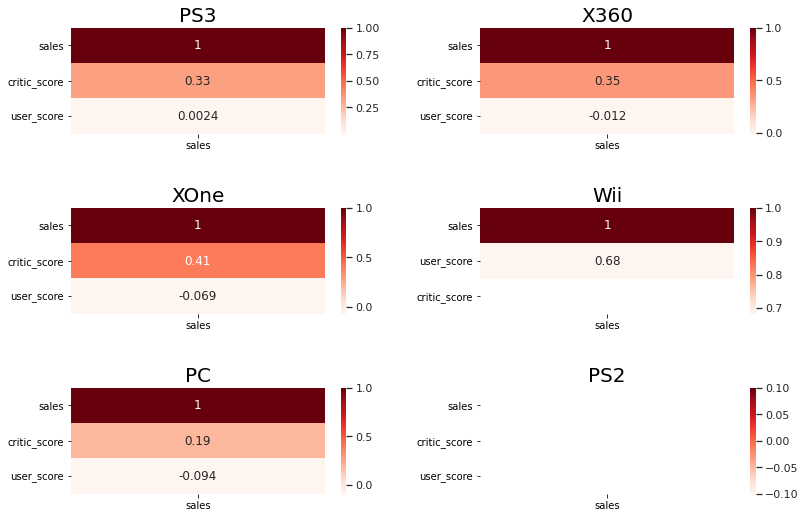

In [68]:
top = ['PS3','X360','XOne', 'Wii', 'PC', 'PS2']

rows = len(top) // 2
columns = 2
fig, axes = plt.subplots(rows, columns, figsize=(12,8))
count = 0
for r in range(rows):
    for c in range(columns):
        platform = top[count]
        df_plt = new_df[(new_df['platform'] == platform) & (new_df['user_score'] > 0)].copy()
        
        df_filtered = df_plt[['sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales']].sort_values(by='sales', ascending=False), 
                         cmap="Reds", annot=True, annot_kws={'size':12}, ax=axes[r,c])
        ax.set_title(platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Подводя итоги, можно отметить:
1. Как с PS4 наблюдается большая корреляция по отзывам критиков у PS3, PS2, X360 и XOne;
2. Корреляция по отзывам пользователей либо очень маленькая либо вообще отсутствует;
3. Приобретение игр на платформе Wii практически не связано с отзывами критиков или пользователей;
4. Наибольшая корреляция по отзывам пользователей наблюдается у PS2.

### Распределение игр по жанрам

Для начала посмотрим на самые популярные игры

In [69]:
df_genre = top_6.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False).reset_index().rename_axis(None, axis=1)
df_genre

genre   sales
0         Action  269.49
1        Shooter  221.64
2         Sports  144.07
3   Role-Playing   62.39
4           Misc   50.91
5         Racing   38.82
6       Platform   32.61
7       Fighting   25.79
8      Adventure   15.61
9     Simulation    3.86
10      Strategy    3.41
11        Puzzle    1.38

Самыми продаваемыми жанром игр является `Action`, который лидирует с большим отрывом. Далее идут `Shooter`, `Sports` и `Role-Playing`

Визуализируем

Text(0, 0.5, 'Продажи')

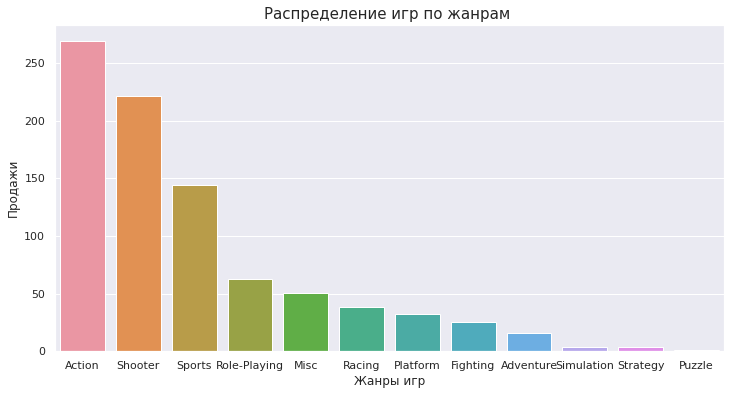

In [70]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=df_genre, x='genre', y='sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

**Проверим рентабельность игр по жанрам**

In [71]:
prof_genre = new_df.groupby('genre').agg({'name': 'count', 'sales': 'sum'})

prof_genre['profitability'] = prof_genre['sales'] / prof_genre['name']
prof_genre.sort_values(by='profitability', ascending=False)

name   sales  profitability
genre                                    
Shooter        187  232.98       1.245882
Sports         214  150.65       0.703972
Platform        74   42.63       0.576081
Role-Playing   292  145.89       0.499623
Racing          85   39.89       0.469294
Fighting        80   35.31       0.441375
Action         766  321.87       0.420196
Misc           155   62.82       0.405290
Simulation      62   21.76       0.350968
Puzzle          17    3.17       0.186471
Strategy        56   10.08       0.180000
Adventure      245   23.64       0.096490

Так, наибольшая рентабельность у игра с жанрами: 
1. Shooter
2. Sports 
3. Platform 

**Вывод по разделу:** 
1. Популярность игр началась с 1991 года, пик приходится на `2008-2009 года`;
2. До 2016 года наиболее популярным устройством было `PS2`;
3. Наиболее перспективными платформами на 2017 год являются `PS4` и `XOne`.
4. Чем выше отзывы критиков, тем популярней игра и больше продаж;
5. Cамый популярный жанр игр - `Action`.
6. Самый рентабельный жанр игр - `Platform`

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5) в регионах NA, EU, JP

Рассмотрим самые популярные платформы (топ-5) в регионах NA, EU, JP

**Выделим топ-5 платформ в Америке по продажам**

In [72]:
na_platform = new_df.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
top_na_platform = na_platform.head()
top_na_platform

na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20

Как мы видим, самой продаваемой платформой является PS4. 

Остальные платформы, не входящие в топ-5 обозначим - `Другие`

In [73]:
top_na_platform.loc['Другие', 'na_sales'] = na_platform.iloc[5:].sum()[0]
print(top_na_platform)

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
Другие       52.49


/tmp/ipykernel_136/318632176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Визуализируем

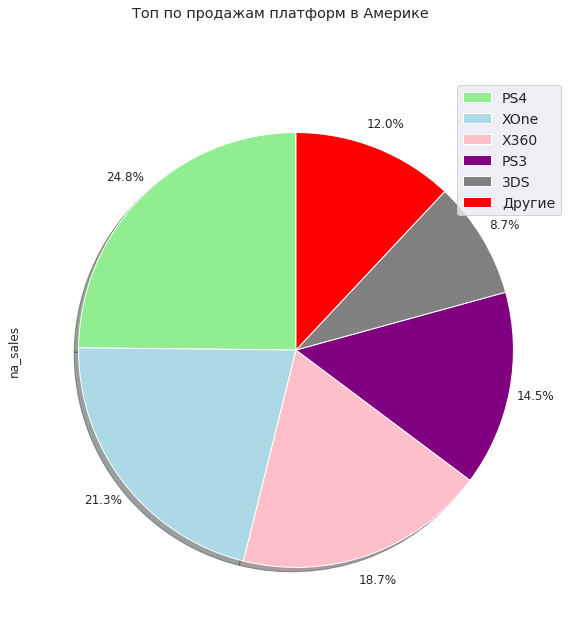

In [74]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'red']
top_na_platform.plot(kind='pie', figsize=(17, 10), autopct = '%1.1f%%', subplots=True, legend=False,
                     startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors, title='Tоп по продажам платформ в Америке')
plt.legend(labels=top_na_platform.index, loc='upper right', fontsize=14)
plt.show()

Самыми продаваемыми платформами в Америке являются:
1. PS4
2. XOne
3. X360

**Выделим топ-5 платформ в Европе по продажам**

In [75]:
eu_platform = new_df.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
top_eu_platform = eu_platform.head()
top_eu_platform

eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96

Топ-5 рейтинг в Европе практически, как и в Америке, первоме место занимает `PS4`, последнее -`3DS`.

Остальные платформы, не входящие в топ-5 обозначим - `Другие`

In [76]:
top_eu_platform.loc['Другие', 'eu_sales'] = eu_platform.iloc[5:].sum()[0]
print(top_eu_platform)

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
Другие       58.26


/tmp/ipykernel_136/2612229197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Визуализируем

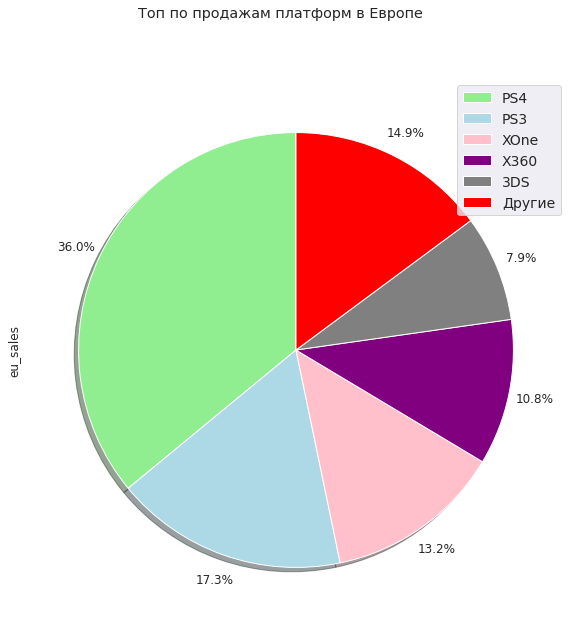

In [77]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'red']
top_eu_platform.plot(kind='pie', figsize=(17, 10), autopct = '%1.1f%%', subplots=True, legend=False,
                     startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors, title='Tоп по продажам платформ в Европе')
plt.legend(labels=top_eu_platform.index, loc='upper right', fontsize=14)
plt.show()


Самыми продаваемыми платформами в Европе являются:
1. PS4
2. PS3
3. XOne

**Выделим топ-5 платформ в Японии по продажам**

In [78]:
jp_platform = new_df.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
top_jp_platform = jp_platform.head()
top_jp_platform

jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88

Топ рейтинг отличается от Американского и Европейского, первое место занимает - `3DS`, далее идут `PS3` и `PSV`

Остальные платформы, не входящие в топ-5 обозначим - `Другие`

In [79]:
top_jp_platform.loc['Другие', 'jp_sales'] = jp_platform.iloc[5:].sum()[0]
print(top_jp_platform)

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88
Другие        4.19


/tmp/ipykernel_136/1352514037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Данные показывают, что платформы, не входящие в топ-5, в Японии не являются популярными и занимают очень маленькую долю рынка. 

Визуализируем

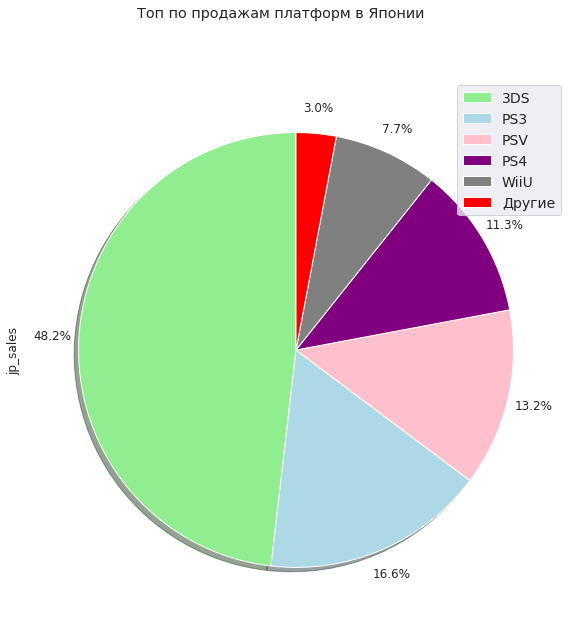

In [80]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'red']
top_jp_platform.plot(kind='pie', figsize=(17, 10), autopct = '%1.1f%%', subplots=True, legend=False,
                     startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors, title='Tоп по продажам платформ в Японии')
plt.legend(labels=top_jp_platform.index, loc='upper right', fontsize=14)
plt.show()

Самыми продаваемыми платформами в Японии являются:
1. 3DS
2. PS3
3. PSV

**Выводы:**
Самыми популярными платформами являются:
- Америка - `PS4`
- Европа - `PS4`
- Япония - `3DS`


**Выводы:**
1. Самыми популярными платформами являются*:
- Америка - `PS4`
- Европа - `PS4`
- Япония - `3DS`


### Самые популярные жанры (топ-5) 

Сгруппруем продажи по жанрам 

In [81]:
df_grouped_2 = new_df.groupby('genre').sum()
na_genre = df_grouped_2['na_sales'].sort_values(ascending=False).head(5)
eu_genre = df_grouped_2['eu_sales'].sort_values(ascending=False).head(5)
jp_genre = df_grouped_2['jp_sales'].sort_values(ascending=False).head(5)

Создадим новую функцию

In [82]:
def genres(genre, title):
    colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey']
    genre.plot(kind='pie', figsize=(17, 10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None, pctdistance=1.12, colors=colors, title=title)
    plt.legend(labels=genre.index, loc='upper right', fontsize=14)
    plt.show()

**Построим круговую диаграмму для Америки**

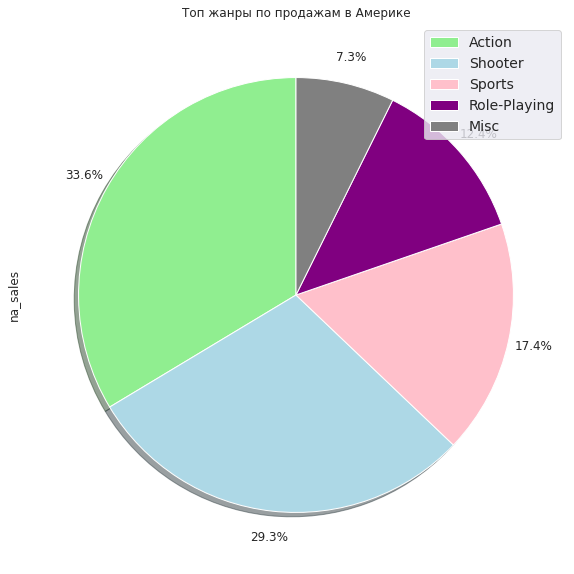

In [83]:
genres(na_genre, 'Tоп жанры по продажам в Америке')

**Построим круговую диаграмму для Европы**

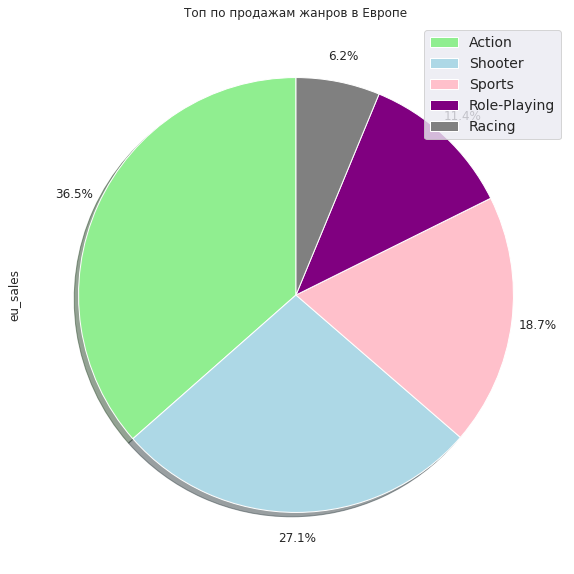

In [84]:
genres(eu_genre, 'Tоп по продажам жанров в Европе')


**Построим круговую диаграмму для Японии**

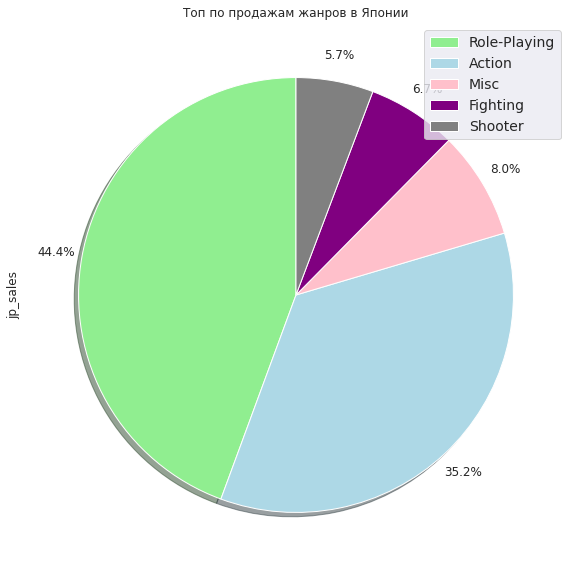

In [85]:
genres(jp_genre, 'Tоп по продажам жанров в Японии')

**Выводы:**
1. `В Америке и Европе топ-3` самых популярных жанра являются:
- Action;
- Shooter;
- Sports.
2. `В Японии` самыми популярными жанрами являются: 
- Role-Playing;
- Action;
- Misc. 





###  Зависимость рейтинга ESRB на продажи в отдельном регионе

Для начала опишем все имеющиеся виды рейтинга в ESBN 

In [86]:
new_df['rating'].unique()

array(['M', 'undefined_rating', 'E', 'T', 'E10+'], dtype=object)

- `E` - игры для всех;
- `undefined_rating` - рейтинг не определен;
- `M` - игры для взрослых старше 17 лет;
- `T` - игры для подростков от 13 лет;
- `E10+` - игры для всех от 10 лет;
- `AO` - игры для взрослых старше 18;
- `EC` - игры для детей младшего возраста;
- `RP` - игра ожидает присвоение рейтинга. 


**Построим столбчатую диаграмму для Америки**

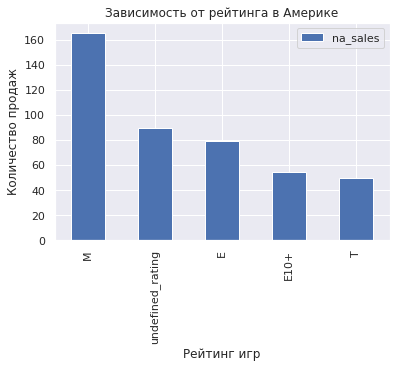

In [87]:
new_df.groupby(by='rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head().plot(kind='bar', title='Зависимость от рейтинга в Америке', xlabel='Рейтинг игр', ylabel='Количество продаж')
plt.show()


Выводы: 
- Наибольшее количество продаж у рейтинга для взрослых - `M`, далее идут игры `без рейтинга` и игры с рейтингом `E`. 
- Зависимость от рейтинга `ESRB` большая, поскольку это Американский рейтинг, но при этом много продаж игр, которые находятся вне рейтинга.

**Построим столбчатую диаграмму для Европы**

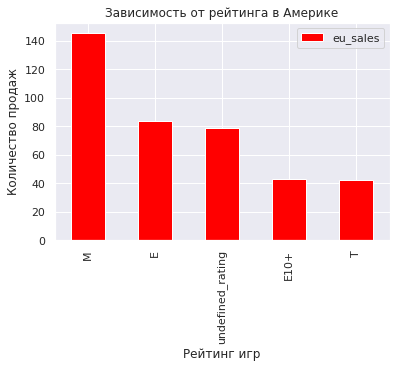

In [88]:
new_df.groupby(by='rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head().plot(kind='bar', title='Зависимость от рейтинга в Америке', xlabel='Рейтинг игр', ylabel='Количество продаж', color='red')
plt.show()

Выводы: 
- Самый популярный рейтинг игр в Европе, как и в Америке, - `M`, далее - `E` и `Игры без рейтинга` 
- Зависимость от рейтинга `ESRB` большая, поскольку, практически, как и в Америке, но при этом много продаж игр, которые находятся вне рейтинга.



**Построим столбчатую диаграмму для Японии**

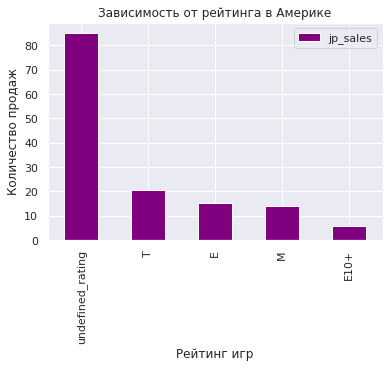

In [89]:
new_df.groupby(by='rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head().plot(kind='bar', title='Зависимость от рейтинга в Америке', xlabel='Рейтинг игр', ylabel='Количество продаж', color='purple')
plt.show()

Зависимость от рейтинга `ESRB` практически минимальна.

**Выводы:**
1. В `Америке` и `Европе` самыми `популярными` играми являются игры для взрослых с рейтингом `М`.
2. В `Японии` с большим отрывом `лидирует` категория с `неопределенным рейтингом`. Скорее всего это связано с тем, что в Японии рейтинг `ESRB` не является популярным либо игры не проходили оценку в этом рейтинге.

**Вывод по разделу:**
1. Самыми популярными платформами являются:
- Америка - PS4
- Европа - PS4
- Япония - 3DS
2. Самыми популярными жанрами являются: 

В Америке и Европе
- Action; 
- Shooter;
- Sports;

В Японии: 
- Role-Playing;
- Action;
- Sports. 

3. Зависимость рейтинга ESRB на продажи:
- В Америке и Европе практически прямая зависимость;
- В Японии отсутствует. 

## Проверка гипотез

**Имеется две гипотезы:**

`1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;`

`2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.`

Поскольку в каждой из гипотез выборки между собой независимы друг от друга будем использовать t-критерий Стьюдента для их проверки

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0 — средние пользовательские рейтинги платформы Xbox One равны со средними пользовательскими рейтингами платформы PC.

H_1 — средние пользовательские рейтинги платформы Xbox One различаются со средним пользовательскими рейтингами платформы PC.

Создадим пару датафреймов - xbox и pc. 


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [90]:
xbox = new_df.query('platform == "XOne"')['user_score'].dropna()
pc = new_df.query('platform == "PC"')['user_score'].dropna()
print('Дисперсия платформы XOne:', xbox.var(ddof=1))
print('Дисперсия платформы PC:', pc.var(ddof=1))

Дисперсия платформы XOne: 1.9069968429360695
Дисперсия платформы PC: 3.035892752408882


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font>

Полученные дисперсии сильно отличаются между собой, поэтому при функции необходимо будет добавить аргумент equal_var=False

In [91]:
alpha = .05

results = st.ttest_ind(
    pc, 
    xbox, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

**Вывод:** 
Нам не получилось отвергнуть нулевую гипотезу, что свидетельствует о том, что `средние пользовательские рейтинги платформ Xbox One и PC одинаковые`. 

Скорее всего это связано с тем, что игры на Xbox One и PС аналогично, что и повлияло на рейтинг.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H_0 — средние пользовательские рейтинги жанра Action равны со средними пользовательскими рейтингами жанра Sports.

H_1 — средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

Создадим пару датафреймов - action и sports. 

In [92]:
action = new_df.query('genre == "Action"')['user_score'].dropna()
sports = new_df.query('genre == "Sports"')['user_score'].dropna()
print('Дисперсия жанра Екшн:', xbox.var(ddof=1))
print('Дисперсия жанра Спорт:', pc.var(ddof=1))

Дисперсия жанра Екшн: 1.9069968429360695
Дисперсия жанра Спорт: 3.035892752408882


Полученные дисперсии сильно отличаются между собой, поэтому при функции необходимо будет добавить аргумент equal_var=False

In [93]:
alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:** исходя из полученные результатов следует, что средние пользовательские рейтинги жанра Action различаются со средним пользовательскими рейтингами жанра Sports

**Вывод по разделу:** в настоящем разделе нами были проверены 2 гипотезы, в рамках которых мы пришли к следующим выводам: 
1. `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`. Данная гипотеза была подтверждена. Действительно, указанные платформы имеют определенные зависимости. Скорее всего, данные платформы имеют одинаковые игры, которые имеют схожий рейтинг. 
2. `Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные`. На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров `Action` и `Sports` в пользу альтернативной гипотезы. 

## Общий вывод

В данной работе были исследованы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы для игр. 

На первом этапе работы был импортирован и изучен датафрейм - `'/datasets/games.csv'`

Далее была осуществлена предобработка данных, в рамках которой было преобразовано ряд столбцов в другой формат, созданы новые столбцы, а также осуществлена проверка датафреймов на пропущенные значения и дубликаты.

После преобработки данных начался исследовательский процесс, где были изучены следующие вопросы:
- Анализ выпуска игр в разные года; 
- Анализ изменения продаж на различных платформах;
- Осуществлен прогноз на 2017 год по перспективным платформам;
- Определены потенциально прибыльные платформы;
- Проанализировано влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы; 
- Проверена рентабельность игр по жанрам

В рамках данного исследования нами было установлено:
1. `Активный рост` числа игр начался `с 1993 года`. `В 2008-2009` зафиксирован `пик выпускаемых игр`;
2. Установлен `средний срок жизни платформы - 7 лет`;
3. Наиболее `перспективными` платформами на 2017 год являются `PS4`, `XOne`;
4. Наибольшие `медианные` и `средние` продажи зафиксированы у платформ `XOne`, `PS4` и `X360`;
5. `Наблюдается` большая `корреляция` по `отзывам критиков` у PS4, PS3, X360 и XOne - `0,35 - 0,41`. Наибольшая корреляция по отзывам пользователей у `3DS` - `0,24`;
6. Cамый `популярный` жанр игр - `Action`;
7. Самый `рентабельный` жанр игр - `Shooter`.

Затем был определен портет пользователя по регионам Америка, Европа и Япония:
1. Самыми популярными платформами являются:
- Америка - `PS4`
- Европа - `PS4`
- Япония - `3DS`

2. Самыми популярными жанрами являются: 

В Америке и Европе
- `Action`; 
- `Shooter`;
- `Sports`.

В Японии: 
- `Role-Playing`;
- `Action`;
- `MISC`. 

3. Зависимость рейтинга ESRB на продажи:
- В Америке и Европе практически прямая зависимость от рейтинга;
- В Японии зависимость отсутствует, что связано с тем, что данный рейтинг пользуется популярностью только в США

После определения портрета пользователя по регионам, было рассмотрено 2 гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

По результатам рассмотрения гипотез были оформлены следующие выводы:
1. Первая гипотеза была подтверждена. Это связано скорее всего с тем, что платформы имеют одинаковый набор игр, что непосредственно влияет на рейтинг.
2. Вторая гипотеза была опровергнута. Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются между собой. 

Таким образом, подводя итоги, можно выделить:
1. В ближайшие годы будут пользоваться популярностью платформы `PS4`, `XOne`;
2. Самыми популярными жанрами во всех регионах являются `Action`, `Shooter`, `Role-Playing;
3. При рассмотрении игр в регионах Америки и Европы стоит обращать внимание на отзывы критиков и рейтинг ESRB.
